In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set_style("whitegrid")



In [3]:
df = pd.read_csv('../data/artist_top10_track_clean.csv')
df.shape

(80, 9)

In [4]:
#Count of unique artists
df['Artist'].nunique()

8

In [5]:
#List of unique artists with followers
df[['Artist', 'Followers']].drop_duplicates().sort_values(by='Followers',ascending=False, ignore_index = True)

,Artist,Followers
0,Joji,10277433
1,Fujii Kaze,4265047
2,Cocktail,2351481
3,THE TOYS,1583082
4,PUN,608714
5,Paul Partohap,210521
6,J_ust,101251
7,oftn,19968


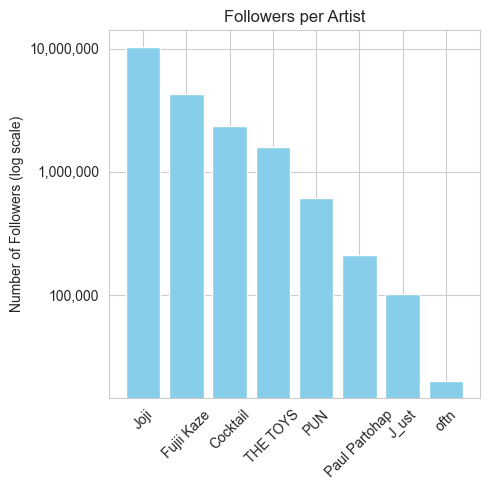

In [6]:
#Visualize the difference in followers among artists
#Remove duplicate rows to ensure only one follower value per artist
artist_followers = df[['Artist', 'Followers']].drop_duplicates().sort_values(by='Followers',ascending=False, ignore_index = True)
plt.figure(figsize=(5, 5))
plt.bar(artist_followers['Artist'], artist_followers['Followers'], color='skyblue')
plt.title('Followers per Artist')
plt.ylabel('Number of Followers (log scale)')
plt.yscale('log') #Use logarithmic scale for y-axis to handle large differences in values


#Format y-axis tick labels with comma separators
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visual/followers_per_artist.png')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8188\1644945762.py:8: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) Arial.
  plt.savefig('../visual/top_10_song_popularity.png')
C:\Users\User\AppData\Local\Temp\ipykernel_8188\1644945762.py:8: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from font(s) Arial.
  plt.savefig('../visual/top_10_song_popularity.png')
C:\Users\User\AppData\Local\Temp\ipykernel_8188\1644945762.py:8: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from font(s) Arial.
  plt.savefig('../visual/top_10_song_popularity.png')
d:\Coding\Data Engineer Learning\Spotify_Project\spotify_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Coding\Data Engineer Learning\Spotify_Project\spotify_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from font

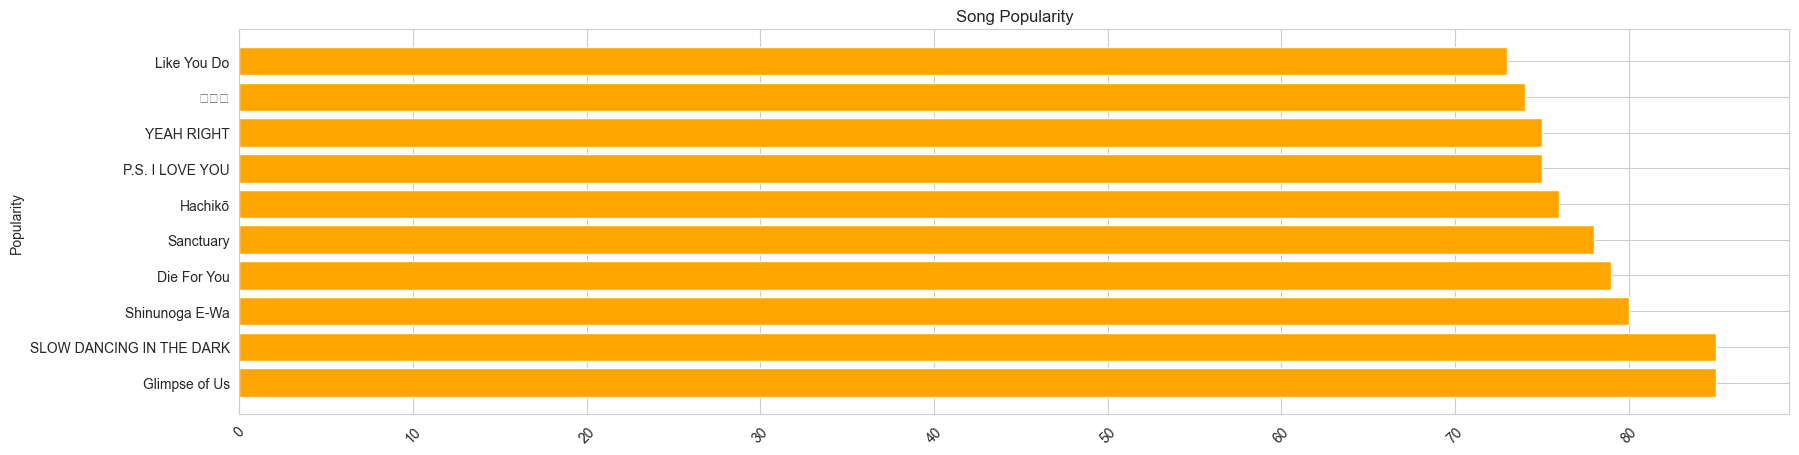

In [ ]:
#Visualize the top 10 most popular tracks
song_popular = df.sort_values(by = 'Popularity',ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.barh(song_popular['Name'], song_popular['Popularity'], color = 'orange',)
plt.title('Tracks Popularity')
plt.ylabel('Popularity')
plt.xticks(rotation = 45)
plt.savefig('../visual/top_10_song_popularity.png')
plt.show()

In [ ]:
#Sort artists by their average track popularity
avg_artist_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
avg_artist_popularity

Artist
Joji             76.4
Fujii Kaze       67.7
PUN              64.5
Cocktail         63.2
THE TOYS         55.6
Paul Partohap    55.0
oftn             42.8
J_ust            41.1
Name: Popularity, dtype: float64

In [9]:
avg_artist_popularity.index

Index(['Joji', 'Fujii Kaze', 'PUN', 'Cocktail', 'THE TOYS', 'Paul Partohap',
       'oftn', 'J_ust'],
      dtype='object', name='Artist')

In [10]:
avg_artist_popularity.values

array([76.4, 67.7, 64.5, 63.2, 55.6, 55. , 42.8, 41.1])

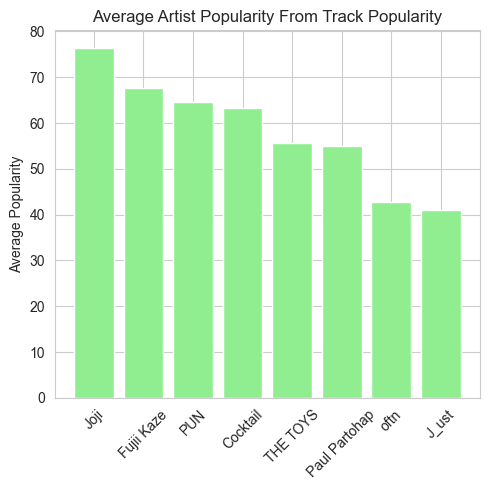

In [15]:
#Visualize the artists popularity
plt.figure(figsize=(5,5))
#.index .values help to map index and value
plt.bar(avg_artist_popularity.index, avg_artist_popularity.values, color='lightgreen')
plt.title('Average Artist Popularity From Track Popularity')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visual/avg_artist_popularity.png')
plt.show()

In [ ]:
#Sort artist by average track duration
song_mean = df.groupby('Artist')['Duration'].mean().sort_values(ascending=False)
song_mean_format = song_mean.apply(lambda x: f'{int(x/60000)}:{int((x%60000)/1000):02}')
song_mean_format

Artist
Cocktail         4:34
Fujii Kaze       4:19
PUN              4:00
J_ust            3:54
Paul Partohap    3:46
THE TOYS         3:20
Joji             3:18
oftn             3:15
Name: Duration, dtype: object

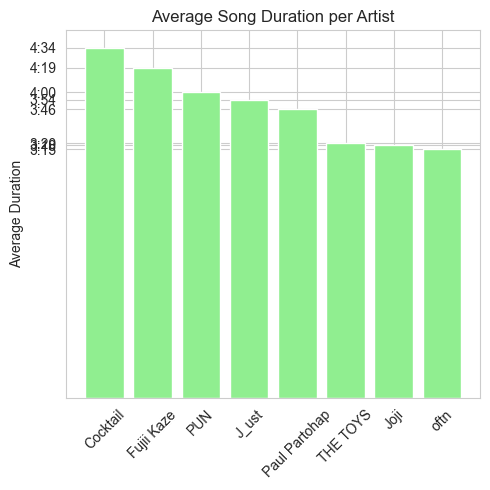

In [ ]:
#Visualize the average track duration for each artist
plt.figure(figsize=(5,5))
plt.bar(song_mean.index, song_mean.values, color='lightgreen')
plt.title('Average Track Duration per Artist')
plt.ylabel('Average Duration')
plt.yticks(ticks = song_mean.values, labels=song_mean_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visual/avg_song_duration.png')
plt.show()

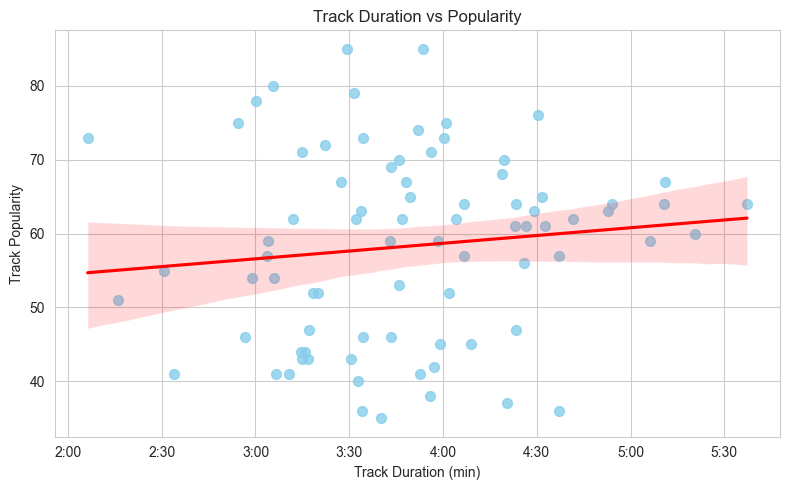

In [ ]:
#Analyze the relationship between track duration and popularity
#to see if longer or shorter songs tend to be more popular

df['Duration_min'] = df['Duration'] / 60000  #Convert duration from ms to minutes
plt.figure(figsize=(8,5))

#Scatter plot with regression line showing popularity vs duration
sns.regplot(x='Duration_min', y='Popularity', data=df,
            scatter_kws={'color': 'skyblue', 's': 50},
            line_kws={'color': 'red'})
plt.title('Track Duration vs Popularity')
plt.xlabel('Track Duration (min)')
plt.ylabel('Track Popularity')

#Format x-axis labels to display minutes and seconds (mm:ss)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}:{int((x - int(x)) * 60):02}'))
plt.tight_layout()
plt.savefig('../visual/duration_vs_popularity.png')
plt.show()
